# Essential packages

The following packages are your bread and butter. We show some important functionalities here. 

## Numpy

For array manipulations, linear algebra, interpolation and basic statistics.

In [2]:
import numpy as np

### Define arrays

In [3]:
# Using np.array() to create from a list
arr1 = np.array([1, 2, 3, 4, 5])

# Using np.arange() to create sequential array
arr2 = np.arange(0, 10, 2)  # Creates [0, 2, 4, 6, 8]

# Using np.zeros() and np.ones() with specific data types
arr3 = np.zeros(5, dtype=np.int32)  # Creates [0, 0, 0, 0, 0]
arr4 = np.ones(3, dtype=np.float64)  # Creates [1., 1., 1.]

# Creating arrays with specific data types
arr5 = np.array([1, 2, 3], dtype=np.float32)  # 32-bit floating point
arr6 = np.array([True, False, True], dtype=np.bool_)  # Boolean
arr7 = np.array(['a', 'b', 'c'], dtype=str)  # String array

# Creating 2D arrays with specific types
arr8 = np.zeros((2, 3), dtype=np.complex128)  # 2x3 array of complex numbers
arr9 = np.ones((3, 2), dtype=np.uint8)  # 3x2 array of unsigned 8-bit integers



In [4]:
arr9

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In this part of the course (C1), you don't need to worry too much about  data types. 
This will be covered next term in C2. 

Hence, we will often just use `np.array()`, `np.zeros()` and `np.ones()` without specifying the data type.
For instance:

In [8]:
print(np.array([1, 2, 3]))
print(np.zeros(5))
print(np.ones(3))


[1 2 3]
[0. 0. 0. 0. 0.]
[1. 1. 1.]


### Operate on arrays

In [5]:
# Basic arithmetic operations (vectorized)
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

# Element-wise operations
sum_arr = a + b  # [11, 22, 33, 44]
diff_arr = b - a  # [9, 18, 27, 36] 
prod_arr = a * b  # [10, 40, 90, 160]
div_arr = b / a  # [10., 10., 10., 10.]

# Broadcasting with scalars
scaled = a * 2  # [2, 4, 6, 8]
offset = a + 100  # [101, 102, 103, 104]

# Mathematical functions
squares = np.square(a)  # [1, 4, 9, 16]
sqrt = np.sqrt(a)  # [1., 1.41421356, 1.73205081, 2.]
exp = np.exp(a)  # [2.71828183, 7.3890561, 20.08553692, 54.59815003]

# Aggregation operations
total = np.sum(a)  # 10
mean = np.mean(a)  # 2.5
maximum = np.max(a)  # 4
minimum = np.min(a)  # 1

# Boolean operations
mask = a > 2  # [False, False, True, True]
filtered = a[mask]  # [3, 4]


In [6]:
# np.where example - returns indices where condition is met
arr = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Find indices where array is greater than 3
indices = np.where(arr > 3)  # Returns (array([3, 4, 5]),)

# Can also use where as a conditional selector
result = np.where(arr > 3, arr, 0)  # Replace values <= 3 with 0
# result: [0, 0, 0, 4, 5, 4, 0, 0, 0]


In [12]:
# Broadcasting example: Temperature conversion for multiple cities
# Suppose we have daily temperatures for 3 cities over 4 days in Celsius
temps_celsius = np.array([
    [20, 22, 21, 23],  # City 1
    [25, 24, 26, 25],  # City 2
    [18, 19, 17, 20]   # City 3
])

# To convert to Fahrenheit, we need to multiply by 9/5 and add 32
# Broadcasting allows us to perform this operation on the entire array at once
temps_fahrenheit = (temps_celsius * 9/5) + 32

print("Temperatures in Celsius:")
print(temps_celsius)
print("\nTemperatures in Fahrenheit:")
print(temps_fahrenheit)


Temperatures in Celsius:
[[20 22 21 23]
 [25 24 26 25]
 [18 19 17 20]]

Temperatures in Fahrenheit:
[[68.  71.6 69.8 73.4]
 [77.  75.2 78.8 77. ]
 [64.4 66.2 62.6 68. ]]


In [17]:

# We can also calculate daily temperature deviations from each city's mean
city_means = np.mean(temps_celsius, axis=1, keepdims=True)  # Shape: (3,1)
print("\nCity means:")
print(city_means)



City means:
[[21.5]
 [25. ]
 [18.5]]


In [10]:
# Broadcasting automatically expands city_means to match temps_celsius shape
temp_deviations = temps_celsius - city_means

print("\nTemperature deviations from city means:")
print(temp_deviations)


Temperature deviations from city means:
[[-1.5  0.5 -0.5  1.5]
 [ 0.  -1.   1.   0. ]
 [-0.5  0.5 -1.5  1.5]]


### Array shapes

If an array `A` has a shape `(m, n)`:

- `m` represents the number of rows.
- `n` represents the number of columns.

For example:


In [11]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
print(A.shape) 


(2, 3)


For higher-dimensional arrays, the shape follows a similar convention, going from outer to inner dimensions:

- In a 3D array, `(depth, rows, columns)`, the first dimension (depth) can represent layers or "pages."
- In a 4D array, it would be `(batch, depth, rows, columns)`, commonly seen in applications like image processing or deep learning.


### Newaxis

Using `np.newaxis` (or `None` indexing) allows you to reshape arrays to match a required format.

For instance, suppose you have a **grayscale image** as a 2D array, where each element represents the brightness of a pixel. Let’s say it’s a 3x4 image:

In [1]:
import numpy as np

image = np.array([
    [200, 202, 198, 205],
    [197, 203, 204, 200],
    [195, 202, 201, 199]
])  

image.shape


(3, 4)

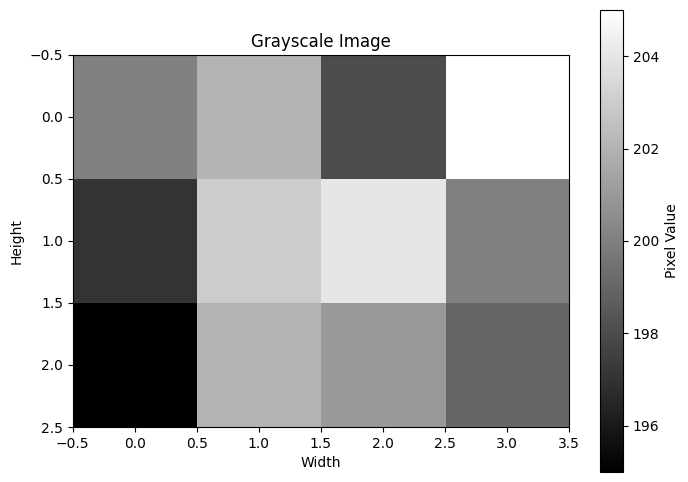

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.colorbar(label='Pixel Value')
plt.title('Grayscale Image')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()



The shape `(3, 4)` means the image has 3 rows (height) and 4 columns (width). 


Say that in our PyTorch ML project we have adopted the convention that the first dimension is the channel dimension (which is the Pytorch convention for image processing). So we would want to add a **channel** dimension as the first dimension to reshape this original `(3, 4)` image into a `(1, 3, 4)` grayscale image.


We can use `np.newaxis` to add this extra dimension in NumPy before converting to a PyTorch tensor:


In [3]:
image_3d = image[np.newaxis, :, :]
print(image_3d.shape)  # Output: (1, 3, 4)

(1, 3, 4)


Now, the shape `(1, 3, 4)` represents:

- **1 channel** (indicating grayscale),

- **3 rows** (height of the image),

- **4 columns** (width of the image).



Finally, you can convert this NumPy array to a PyTorch tensor and get going with our ML stuff:

In [4]:
import torch

image_tensor = torch.from_numpy(image_3d)
print(image_tensor.shape)  # Output: torch.Size([1, 3, 4])


torch.Size([1, 3, 4])


### Simple interpolation

A very useful numpy function is `np.interp()`, to interpolate values in arrays.

In [3]:
# Example of np.interp() - linear 1D interpolation
x = np.array([0, 1, 2, 3, 4])  # Known x values
y = np.array([0, 2, 4, 6, 8])  # Known y values

# Points where we want to interpolate
x_new = 0.5

# Interpolate y values at x_new point
y_new = np.interp(x_new, x, y)

print(y_new)


1.0


In [4]:
# Example of np.interp() with fill values
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 40, 50])

# Points outside the x range
x_new = np.array([0, 2.5, 6])

# Interpolate with fill values -999 and 999 for points outside range
y_new = np.interp(x_new, x, y, left=-999, right=999)

print("x values:", x_new)
print("Interpolated y values:", y_new)  # Will show -999 for x=0 and 999 for x=6

x values: [0.  2.5 6. ]
Interpolated y values: [-999.   25.  999.]


### Random number generation



Random floats:

In [5]:
np.random.rand()

0.7180328174572932

Or of any shape:

In [6]:
np.random.rand(3, 4)

array([[0.11386717, 0.91751388, 0.04063642, 0.13978831],
       [0.2809471 , 0.41062093, 0.1899919 , 0.59523401],
       [0.18907103, 0.71768755, 0.56104886, 0.79628566]])

Random integers:

In [7]:
# between 0 and 10, of shape (3, 4)
np.random.randint(0, 10, size=(3, 4))

array([[1, 8, 9, 7],
       [8, 8, 2, 8],
       [0, 2, 2, 8]])

Set a **random seed** (if you want to make the generated random numbers reproducible)
That is, if you do twice you get the same random numbers.

In [16]:
np.random.seed(42)

In [17]:
np.random.rand(), np.random.rand()


(0.3745401188473625, 0.9507143064099162)

In [22]:
np.random.seed(43)
np.random.rand(), np.random.rand()



(0.11505456638977896, 0.6090665392794814)

Random numbers from normal distribution:

In [23]:
# from a normal distribution with mean 0 and standard deviation 1, of size 50
np.random.normal(loc=0, scale=1, size=50)

array([-0.37850311, -0.5349156 ,  0.85807335, -0.41300998,  0.49818858,
        2.01019925,  1.26286154, -0.43921486, -0.34643789,  0.45531966,
       -1.66866271, -0.8620855 ,  0.49291085, -0.1243134 ,  1.93513629,
       -0.61844265, -1.04683899, -0.88961759,  0.01404054, -0.16082969,
        2.23035965, -0.39911572,  0.05444456,  0.88418182, -0.10798056,
        0.55560698,  0.39490664,  0.83720502, -1.40787817,  0.80784941,
       -0.13828364,  0.18717859, -0.38665814,  1.65904873, -2.04706913,
        1.39931699, -0.67900712,  1.52898513,  1.22121596,  1.01498852,
        0.82812998,  2.26629271, -0.59495567, -0.58126954, -0.65589415,
        0.92514885, -1.29916134,  1.01116687, -0.28844018, -1.06771307])

Random numbers from a uniform distribution:

In [24]:
# between 0 and 1, of size 50
np.random.uniform(low=0, high=1, size=50)


array([0.31026953, 0.24339802, 0.58810404, 0.24534325, 0.74777061,
       0.72014665, 0.69526087, 0.10274278, 0.94364243, 0.50333963,
       0.89967362, 0.19857988, 0.59444919, 0.96540858, 0.99869825,
       0.02416862, 0.48130333, 0.29142269, 0.06372057, 0.5696244 ,
       0.00508328, 0.61127759, 0.87018148, 0.88360146, 0.95431948,
       0.73986382, 0.18471296, 0.43467832, 0.8858995 , 0.25504628,
       0.44331269, 0.61693698, 0.10335251, 0.49010966, 0.0447044 ,
       0.31162747, 0.75203969, 0.71549909, 0.94155424, 0.77689537,
       0.21522851, 0.90497118, 0.55226415, 0.84489789, 0.92248948,
       0.82896128, 0.394198  , 0.59818814, 0.43269808, 0.69414714])

Random numbers without replacement:

In [25]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
# 5 numbers between 0 and 9, without replacement, i.e., no duplicates
np.random.choice(np.arange(10), size=5, replace=False)


array([4, 2, 9, 5, 0])

### Basic matrix operations


Define a matrix:


In [27]:
# Define a 3x3 matrix
A = np.array([[1, 2, 3],
              [0, 1, 4],
              [5, 6, 0]])

A, A.shape

(array([[1, 2, 3],
        [0, 1, 4],
        [5, 6, 0]]),
 (3, 3))

Invert the matrix:

In [28]:

inverse_A = np.linalg.inv(A)
print("Inverse of A:")
print(inverse_A)

Inverse of A:
[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


Multiply two matrices:

In [29]:
inverse_A @ A

array([[ 1.00000000e+00, -3.55271368e-15, -1.42108547e-14],
       [-2.66453526e-15,  1.00000000e+00,  0.00000000e+00],
       [ 6.66133815e-16,  4.44089210e-16,  1.00000000e+00]])

We can also use `np.matmul()` which is what `@` uses:

In [30]:
np.matmul(inverse_A, A)

array([[ 1.00000000e+00, -3.55271368e-15, -1.42108547e-14],
       [-2.66453526e-15,  1.00000000e+00,  0.00000000e+00],
       [ 6.66133815e-16,  4.44089210e-16,  1.00000000e+00]])

Or `np.dot()`:

In [31]:
np.dot(inverse_A, A)

array([[ 1.00000000e+00, -3.55271368e-15, -1.42108547e-14],
       [-2.66453526e-15,  1.00000000e+00,  0.00000000e+00],
       [ 6.66133815e-16,  4.44089210e-16,  1.00000000e+00]])

Note that `np.dot` and `np.matmul` differ for higher-dimensional (more than 2) arrays.


With `inverse_A @ A` we recover almost the identity matrix, but not quite, because of floating point precision issues.

Identity matrix:

"I" pronounced "eye"

In [32]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

or `np.identity`:

In [33]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

We can check that our previous inverse operation was correct by checking that `inverse_A @ A` is almost the identity matrix
with a small tolerance corresponding to floating point precision:

In [34]:
np.allclose(inverse_A @ A, np.eye(3))

True

`np.allclose` has two parameters:

- `atol`: absolute tolerance, set to `1e-6` by default.

- `rtol`: relative tolerance, set to `1e-5` by default.

The condition for two numbers `a` and `b` to be considered "close" is:
$$
|a - b| \leq \text{atol} + \text{rtol} \times |b|
$$

`atol` controls the absolute difference allowed, while `rtol` controls the relative difference allowed.

We can also check closeness with custom tolerances:

In [41]:
are_close = np.allclose(inverse_A @ A, np.identity(3), atol=1e-6, rtol=1e-5)
print(are_close)


True


## Scipy


SciPy is pronounced "Sigh Pie", not "Skeepy!"

It is like numpy, but with more functionality for scientific computing.




### Interpolation

In 1D:


In [35]:
import numpy as np
from scipy.interpolate import interp1d
x = np.array([1, 2, 3, 4, 5])
y = np.log(x)
f = interp1d(x, y, kind='linear')  # x, y are data arrays

x_new = 1.5
y_new = f(x_new)
y_new


array(0.34657359)

Can also operate on arrays:

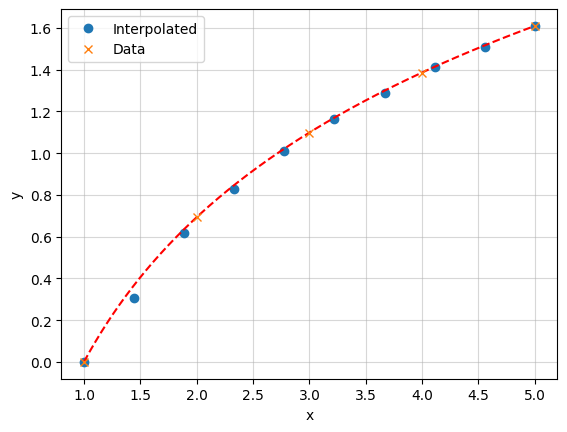

In [38]:
x_new = np.linspace(1, 5, 10)

import matplotlib.pyplot as plt
plt.plot(x_new, f(x_new), 'o', label='Interpolated')
xp = np.linspace(1,5,1000)
yp = np.log(xp)
plt.plot(xp,yp,ls='--',c='r')
plt.plot(x, y, 'x', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(which='both', alpha=0.5)
plt.show()

The x values don't need to be evenly spaced. 

However, the x values must be **monotonically increasing (sorted in ascending order)**.


#### Regularly spaced data in 2D

In 2D, on a regular grid, you can use `RectBivariateSpline` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.html)), which does bivariate spline approximation over a rectangular mesh.



In [40]:
import numpy as np
from scipy.interpolate import RectBivariateSpline

# Define the x and y coordinates
x = np.linspace(0, 10, 10)
y = np.linspace(-1, 1, 5)

# Create a 2D grid for z values based on x and y
X, Y = np.meshgrid(x, y)
print("X.shape, Y.shape:", X.shape, Y.shape)


X.shape, Y.shape: (5, 10) (5, 10)


`np.meshgrid` creates 2D coordinate arrays from 1D arrays x and y.
(It's not broadcasting - instead it explicitly creates two new arrays)

- X has shape (5,10) and contains the x-coordinates repeated for each y value 

- Y has shape (5,10) and contains the y-coordinates repeated for each x value



In [41]:
X,Y

(array([[ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ],
        [ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
          5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]]),
 array([[-1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. , -1. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5

In [42]:
#Define a 2D function on this grid, for fun:
z = np.sin(X) * np.cos(Y)
print("z.shape:", z.shape, z.T.shape)  # Should print (5, 10), (10, 5)

# Initialize the RectBivariateSpline with x, y, and the 2D array z
f = RectBivariateSpline(x, y, z.T) # Note: Transpose z to match (len(x), len(y)), i.e. (10, 5)

# Define new x and y points for interpolation
new_x = np.linspace(0, 10, 100)
new_y = np.linspace(-2, 2, 50)

# Perform interpolation
z_interp = f(new_x, new_y)

# Output the interpolated values
print(z_interp)


z.shape: (5, 10) (10, 5)
[[-3.14525554e-19 -3.14525554e-19 -3.14525554e-19 ...  5.06462359e-18
   5.06462359e-18  5.06462359e-18]
 [ 6.41533305e-02  6.41533305e-02  6.41533305e-02 ...  6.41533305e-02
   6.41533305e-02  6.41533305e-02]
 [ 1.24462421e-01  1.24462421e-01  1.24462421e-01 ...  1.24462421e-01
   1.24462421e-01  1.24462421e-01]
 ...
 [-1.87678880e-01 -1.87678880e-01 -1.87678880e-01 ... -1.87678880e-01
  -1.87678880e-01 -1.87678880e-01]
 [-2.41220441e-01 -2.41220441e-01 -2.41220441e-01 ... -2.41220441e-01
  -2.41220441e-01 -2.41220441e-01]
 [-2.93935861e-01 -2.93935861e-01 -2.93935861e-01 ... -2.93935861e-01
  -2.93935861e-01 -2.93935861e-01]]


In [43]:
print(z.shape, z_interp.T.shape)

(5, 10) (50, 100)


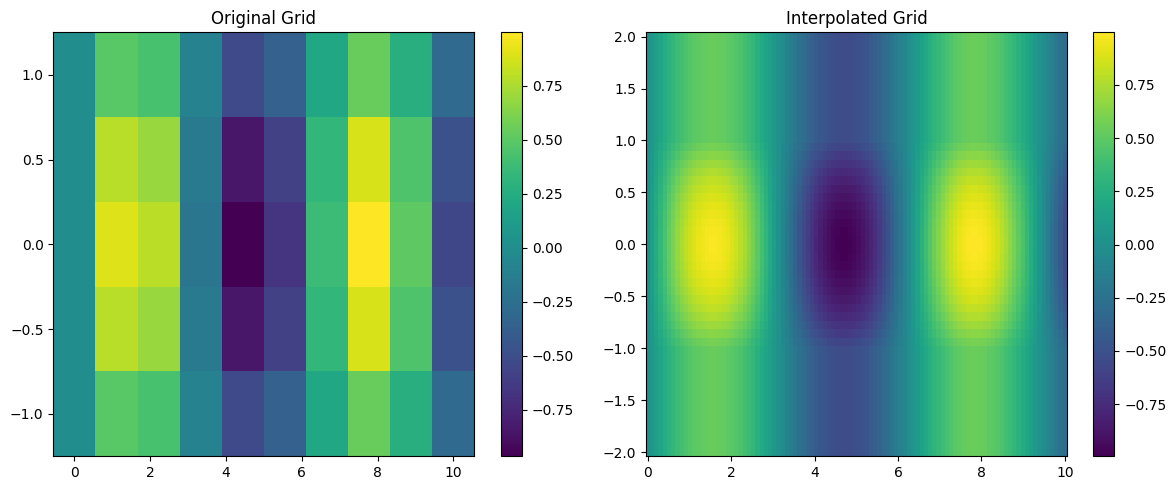

In [111]:
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot original grid
im1 = ax1.pcolormesh(X, Y, z)
ax1.set_title('Original Grid')
plt.colorbar(im1, ax=ax1)

# Create meshgrid for interpolated data
X_new, Y_new = np.meshgrid(new_x, new_y)

# Plot interpolated grid 
im2 = ax2.pcolormesh(X_new, Y_new, z_interp.T)
ax2.set_title('Interpolated Grid')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()


<div class="exercise-box">
**Exercise:** How does `RectBivariateSpline` deal with extrapolation? Show all relevant examples.
</div>

##### Irregularly spaced data in 2D

`RectBivariateSpline` does not support irregularly spaced data.

In this case we use `griddata` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)).


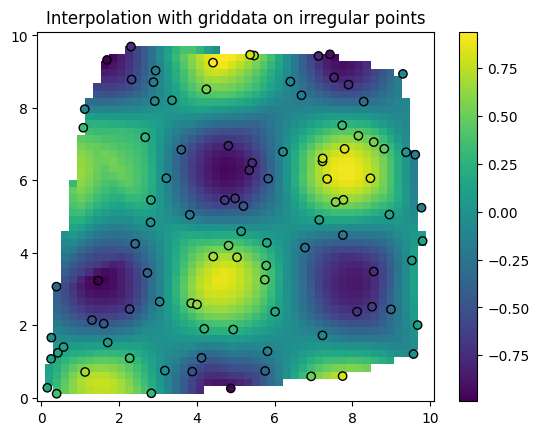

In [44]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Irregularly spaced data points
x = np.random.rand(100) * 10   # x-coordinates
y = np.random.rand(100) * 10   # y-coordinates
z = np.sin(x) * np.cos(y)      # Some function over x and y

# Define a grid where you want to interpolate
xi = np.linspace(0, 10, 50)
yi = np.linspace(0, 10, 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate with griddata
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot the interpolated data
plt.pcolormesh(xi, yi, zi, shading='auto')
plt.scatter(x, y, c=z, edgecolor='k')  # Show original points for reference
plt.colorbar()
plt.title("Interpolation with griddata on irregular points")
plt.show()


#### Higher dimensional interpolation


Because of the [**curse of dimensionality**](https://en.wikipedia.org/wiki/Curse_of_dimensionality), interpolation in higher dimensions is much more difficult.

Options become very limited, and the memory requirements become enormous.

For example a grid with 10 points per dimension in 10D has $10^{10}$ points. If you store floats, this is $10^{10} \times 4$ bytes = 40 TB.


In scipy, two methods are available in principle:

- `RBFInterpolator` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html)) for [radial basis functions](https://en.wikipedia.org/wiki/Radial_basis_function).

- `RegularGridInterpolator` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RegularGridInterpolator.html)) for regular grids.

But in practice, none of these will be good enough for high-dimensional and accurate interpolation.


<div class="exercise-box">
**Exercise:** Extend the 2D interpolation examples to 3D with `RegularGridInterpolator` and `RBFInterpolator`. Then to 4D.

Do some profiling of timing and memory per interpolator call.  Be careful, go step by step with small grids to make sure you don't push your computer too far.
</div>


As you will soon realize, if you have not already, is that deep neural networks have essentially solved the curse of dimensionality.
This is one of the three pillars of the AI revolution we are witnessing. See [here](https://www.youtube.com/watch?v=0Uqnh-_MRB8) at 2:18, for [Marc Mézard](https://en.wikipedia.org/wiki/Marc_Mézard)'s perspective on this. 



### Root finding


### Integration
 
### Optimization

### Linear Algebra
 
### Statistics

### Signal Processing




## Pandas 


## Scikit-learn


## Matplotlib


## Seaborn